<center><img alt="" src="images/0_Cover.jpg"/></center> 

## <center><font color="blue">Basic Statistics, distributions, and transformation</font></center>

<h2 id="(C)-Taufik-Sutanto---2019" style="text-align: center;">(C) Taufik Sutanto - 2019</h2>
<h2 id="tau-data-Indonesia-~-https://tau-data.id" style="text-align: center;">tau-data Indonesia ~ <a href="https://tau-data.id" target="_blank"><span style="color: #0009ff;">https://tau-data.id</span></a></h2>

# Notes and Disclaimer

* This notebook is part of the free (open knowledge) eLearning course at: https://tau-data.id/courses/
* Some images are taken from several resources, we respect those images ownerships and put a reference/citation from where it is originated. Nevertheless, sometimes we are having trouble to find the origin of the image(s). If you are the owner of the image and would like the image taken-out (or want the citation to be revised) from this open knowledge course resources please contact us here with the details: https://tau-data.id/contact/  
* Unless stated otherwise, in general tau-data permit its resources to be copied and-or modified for non-commercial purposes. With condition proper acknowledgement/citation is given.

## Outline:

Bahasan kali ini akan lebih banyak eksplorasi data melalui visualisasi. Deskriptif statistik akan dibahas pada module berikutnya.
    
    * Quick overview basic stats
    * Basic Stats for preprocessing
    * Basic Stat for simple analysis
    * 

In [6]:
# Importing Some Python Modules
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import warnings; warnings.simplefilter('ignore')
from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

%matplotlib inline
plt.style.use('bmh'); sns.set()

In [7]:
# Importing our data example

tips=sns.load_dataset('tips')
print(tips.info())
tips.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB
None


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
df = pd.read_csv('data/price.csv')
df.head()

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,1,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,2,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,3,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,4,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,5,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000


In [11]:
# Basic Statistics can easily be obtained via 
df.describe(include='all')

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
count,936.000000,923.000000,923.000000,935.000000,928.000000,921.000000,936,936,936.000000,9.360000e+02
unique,NaN,NaN,NaN,NaN,NaN,NaN,4,3,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Open,CAT B,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,373,365,NaN,NaN
mean,468.500000,8239.512459,11039.122427,13082.894118,1511.558190,1794.610206,NaN,NaN,786.730769,6.089048e+06
std,270.344225,2561.188953,2565.058074,2586.507654,789.370074,467.395372,NaN,NaN,266.218109,5.015046e+06
min,1.000000,146.000000,1666.000000,3227.000000,775.000000,932.000000,NaN,NaN,-110.000000,3.000000e+04
25%,234.750000,6481.500000,9366.000000,11308.000000,1318.000000,1583.000000,NaN,NaN,600.000000,4.661000e+06
50%,468.500000,8233.000000,11166.000000,13179.000000,1481.000000,1775.000000,NaN,NaN,780.000000,5.879500e+06
75%,702.250000,9967.000000,12688.500000,14848.000000,1653.500000,1982.000000,NaN,NaN,970.000000,7.187250e+06


# Bagaimana menghitung basic statistics terhadap suatu variable?

## Misal berapa rata-rata tip menurut jenis kelamin?

### Count, Sum, Groupby

In [12]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
tips.groupby(["sex"]).count()

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Male,157,157,157,157,157,157
Female,87,87,87,87,87,87


In [14]:
tips.groupby(["sex"]).sum()

,total_bill,tip,size
sex,,,
Male,3256.82,485.07,413
Female,1570.95,246.51,214


In [22]:
d = tips.groupby(["day"]).mean()
print(d.shape)
d

(4, 3)


,total_bill,tip,size
day,,,
Thur,17.682742,2.771452,2.451613
Fri,17.151579,2.734737,2.105263
Sat,20.441379,2.993103,2.517241
Sun,21.410000,3.255132,2.842105


# Unstack

In [23]:
d = tips.groupby(["day"]).mean().unstack()
print(d.shape)
d

(12,)


            day 
total_bill  Thur    17.682742
            Fri     17.151579
            Sat     20.441379
            Sun     21.410000
tip         Thur     2.771452
            Fri      2.734737
            Sat      2.993103
            Sun      3.255132
size        Thur     2.451613
            Fri      2.105263
            Sat      2.517241
            Sun      2.842105
dtype: float64

# Distribution
> the way in which something is shared out among a group or spread over an area

### Random Variable
> a variable whose value is subject to variations due to chance (i.e. randomness, in a mathematical sense). A random variable can take on a set of possible different values (similarly to other mathematical variables), each with an associated probability [wiki](https://en.wikipedia.org/wiki/Random_variable)

**Types**

1. Discrete Random Variables <br>
    Eg: Genders of the buyers buying shoe
2. Continuous Random Variables <br>
    Eg: Shoe Sales in a quarter
    
### Probability Distribution
> Assigns a probability to each measurable subset of the possible outcomes of a random experiment, survey, or procedure of statistical inference. [wiki](https://en.wikipedia.org/wiki/Probability_distribution)

#### Probability Mass Function
probability mass function (pmf) is a function that gives the probability that a discrete random variable is exactly equal to some value

#### Discrete probability distribution(Cumulative Mass Function)
probability distribution characterized by a probability mass function

#### Probability Density Function
function that describes the relative likelihood for this random variable to take on a given value

#### Continuous probability distribution(Cumulative Density function)
probability that the variable takes a value less than or equal to `x`

### Central Limit Theorem
Given certain conditions, the arithmetic mean of a sufficiently large number of iterates of independent random variables, each with a well-defined expected value and well-defined variance, will be approximately normally distributed, regardless of the underlying distribution. [wiki](https://en.wikipedia.org/wiki/Central_limit_theorem)

#### Normal Distribution
A bell shaped distribution. It is also called Gaussian distribution

<img style="float: left;" src="img/normaldist.png" height="220" width="220">
<br>
<br>
<br>
<br>



**PDF**
<br>
<br>
<img style="float: left;" src="img/normal_pdf.png" height="320" width="320">
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

**CDF**
<br>
<br>


<img style="float: left;" src="img/normal_cdf.png" height="320" width="320">

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>


#### Skewness
Measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. [wiki](https://en.wikipedia.org/wiki/Skewness)

<img style="float: left;" src="img/skewness.png" height="620" width="620">
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
#### Kurtosis
Measure of the "peakedness" of the probability distribution of a real-valued random variable [wiki](https://en.wikipedia.org/wiki/Kurtosis)
<br>
<br>
<img style="float: left;" src="img/kurtosis.png" height="420" width="420">
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

#### Binomial Distribution

Binomial distribution with parameters `n` and `p` is the discrete probability distribution of the number of successes in a sequence of n independent yes/no experiments, each of which yields success with probability p. A success/failure experiment is also called a Bernoulli experiment or Bernoulli trial; when n = 1, the binomial distribution is a Bernoulli distribution  [wiki](https://en.wikipedia.org/wiki/Binomial_distribution)
<br>
<br>
<img style="float: left;" src="img/binomial_pmf.png" height="420" width="420">
<br>
<br>
<br>


#### Exponential Distribution
Probability distribution that describes the time between events in a Poisson process, i.e. a process in which events occur continuously and independently at a constant average rate. It has the key property of being memoryless. [wiki](https://en.wikipedia.org/wiki/Exponential_distribution)
<br>
<br>
<img style="float: left;" src="img/exponential_pdf.png" height="420" width="420">
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

#### Uniform distribution
All values have the same frequency [wiki](https://en.wikipedia.org/wiki/Uniform_distribution_(continuous))


<br> 
<br>
<img style="float: left;" src="img/uniform.png" height="420" width="420">
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>




### 6-sigma philosophy
<img style="float: left;" src="img/6sigma.png" height="520" width="520">

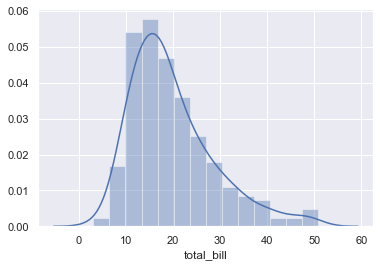

In [5]:
sns.distplot(tips.total_bill, kde=True)

<h1>End of "Basic Statistics" Module</h1>

<hr />